# Постановка задачи
## Часть 1
1. Скачайте данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг." [по ссылке](https://rosstat.gov.ru/labor_market_employment_salaries)
1. Скачайте данные об уровне инфляции в стране [по ссылке](https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)
1. Выберите 2-3 вида экономической деятельности, наиболее интересные Вам. Постройте графики изменения зарплаты по годам для этих видов экономической деятельности. Сделайте выводы
1. Пересчитайте средние зарплаты с учетом уровня инфляции и сравните, как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом
1. Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с учетом инфляции. Сделайте выводы

## Часть 2
1. Опционально: вынесите скаченные данные на публичный сервер (Neon, ElephantSQL, etc.)
1. Реализуйте веб-сервис, который загружает данные (локально или из внешнего хранилища) и предоставляет их соответствующее отображение
1. Добавьте в сервис визуализации данных из первой части проекта

На первом этапе всю аналитику и выводы выполняем в Jupyter Notebook; на втором этапе - переносим ее в Streamlit.
Итоговый результат - это подробная аналитика, представленная в виде веб-приложения, опубликованного на Streamlit Cloud.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
Данные об уровне инфляции в стране представлены в двух видах:
1. Таблица уровня инфляции по месяцам в годовом исчислении - файл "./data/infl_per_year.csv"
2. Таблица уровня инфляции по месяцам - файл "./data/infl.csv"

In [2]:
df_infl = pd.read_csv("./../data/infl.csv", sep='\t')
df_infl.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,0.86,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
1,2023,0.84,0.46,0.37,0.38,0.31,0.37,0.63,0.28,0.87,0.83,1.11,0.73,7.42
2,2022,0.99,1.17,7.61,1.56,0.12,-0.35,-0.39,-0.52,0.05,0.18,0.37,0.78,11.92
3,2021,0.67,0.78,0.66,0.58,0.74,0.69,0.31,0.17,0.60,1.11,0.96,0.82,8.39
4,2020,0.40,0.33,0.55,0.83,0.27,0.22,0.35,-0.04,-0.07,0.43,0.71,0.83,4.91


In [3]:
df_infl_per_year = pd.read_csv("./../data/infl_per_year.csv", sep='\t')
df_infl_per_year.tail()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
29,1995,214.68,215.24,219.73,219.68,222.73,224.73,224.89,224.70,214.18,186.09,161.00,131.33,131.33
30,1994,780.85,682.80,600.09,539.87,479.24,412.09,340.71,265.93,221.19,209.09,204.36,215.02,215.02
31,1993,850.46,758.85,694.06,674.49,717.40,722.89,810.61,956.51,1065.47,1033.23,945.97,839.87,839.87
32,1992,746.67,1014.89,1262.41,914.10,1001.73,1196.60,1325.49,1440.38,1598.83,1917.26,2235.88,2508.85,2508.85
33,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.40,160.40


In [4]:
df_zp_after_2017 = pd.read_excel("./../data/tab3-zpl_2023.xlsx", sheet_name=0, skiprows=4)
df_zp_after_2017.head(15)

,Unnamed: 0,20171),2018,2019,2020,2021,20222),"20232), 3)"
0,Всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
1,"сельское, лесное хозяйство, охота, рыболовст...",25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
2,в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"растениеводство и животноводство, охота и ...",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
4,лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
5,рыболовство и рыбоводство,68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
6,добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
7,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,добыча угля,53065.0,59439.0,63352.8,62600.0,73576.6,90716.5,106102.6
9,добыча нефти и природного газа,104078.3,127771.0,135363.7,142175.0,149585.1,165623.8,180514.7


In [5]:
df_zp_before_2017 = pd.read_excel("./../data/tab3-zpl_2023.xlsx", sheet_name=1, skiprows=2)
df_zp_before_2017.head(15)

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
1,"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
2,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
3,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
4,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,добыча топливно-энергетических полезных иск...,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0
6,"добыча полезных ископаемых, кроме топливно-...",3999.5,5386.5,7035.0,9395.7,10876.6,13176.0,15363.7,19092.7,22937.4,24064.1,28305.8,33580.1,38267.3,41754.4,44441.0,48724.0,54513.0
7,Обрабатывающие производства,2365.2,3446.6,4439.1,5603.4,6848.9,8420.9,10198.5,12878.7,16049.9,16583.1,19078.0,21780.8,24511.7,27044.5,29511.0,31910.0,34592.0
8,из них:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"производство пищевых продуктов, включая на...",2183.4,3126.7,4065.9,5026.7,6065.8,7303.8,8806.7,11069.2,13930.4,15653.1,17316.9,19094.0,21104.8,23326.9,25081.0,26793.0,28779.0


## Особенности в данных по зарплате
- Некоторые колонки содержат некорректные данные (года)
- Присутствуют лишние символы (NBSP:  )
- Некоторые строки содержат группировку ("из них:")
- Название видов деятельности до и после 2016 года отличается

# Выбор видов экономической деятельности
Меня интересуют:
1. IT
2. Финансовый сектор

С учетом "Особенностей в данных по зарплате", необходимо найти соответствие в видах экономической деятельности.
В случае **IT**:
- до 2017 года - это будет подмножество вида деятельности "Транспорт и связь": "из них связь" (32 строка в excel);
- начиная с 2017 года - это будет вид деятельности "деятельность в области информации и связи" (49 строка в excel).

В случае **Финансового сектора**:
- до 2017 года - это будет вид деятельности "Финансовая деятельность" (33 строка в excel);
- начиная с 2017 года - это будет вид деятельности "деятельность финансовая и страховая" (50 строка в excel). 

## Сбор данных о зарплате в конкретных видах деятельности в единый датасет


In [6]:
# Номер строки в excel с учетом пропуска первых неинформативных строк (параметр skiprows) и строки с заголовком
df_zp = df_zp_before_2017.iloc[[28, 29]].reset_index(drop=True)
df_zp_after_2017_subset = df_zp_after_2017.iloc[[43, 44]].reset_index(drop=True)
df_zp = df_zp.merge(df_zp_after_2017_subset, left_index=True, right_index=True)

# Удаление дубликатов заголовков и их переименование
df_zp['Unnamed: 0_x'] = df_zp['Unnamed: 0_y'].str.capitalize()
df_zp = df_zp.drop(columns=['Unnamed: 0_y']).rename(columns={'Unnamed: 0_x': 'Вид деятельности'})

# Корректировка неправильных годов в заголовках
df_zp = df_zp.rename(columns={'20171)': '2017', '20222)':'2022', '20232), 3)':'2023'})

display(df_zp)

,Вид деятельности,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Деятельность в области информации и связи,2879.2,4131.2,5661.5,7304.2,8974.2,11389.1,13220.3,16042.6,19918.1,...,33705.0,34958.0,37984.0,58811.2,66590.0,75898.2,85648.0,97434.4,121262.4,130326.4
1,Деятельность финансовая и страховая,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,...,68565.0,70088.0,80289.0,84904.0,91070.0,103667.8,112680.0,130223.3,146637.1,169105.7


# Графики изменения зарплаты по годам (без инфляции)

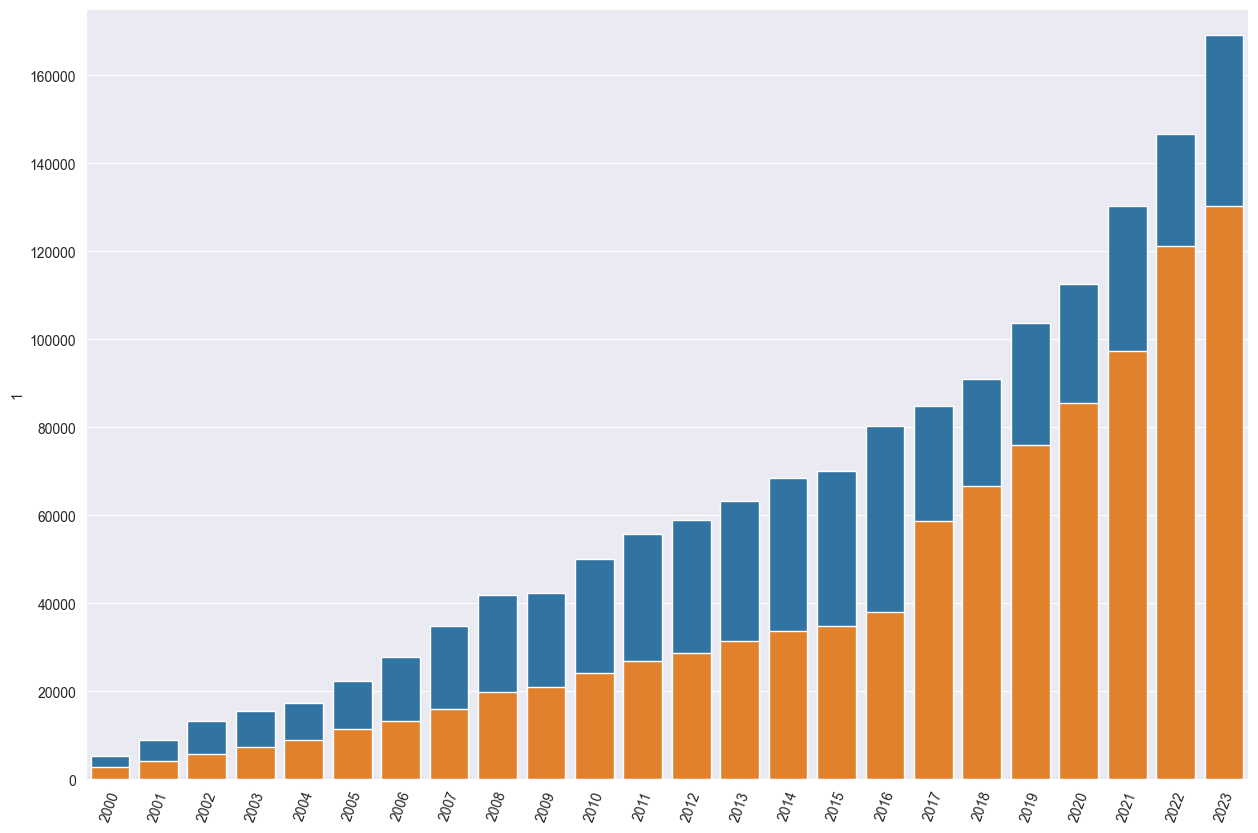

In [107]:
def setup_plot_style(plot):
    plot.tick_params(axis='x', rotation=70)
    plot.set_ylim(0, 175000)

fig, axes = plt.subplots(figsize=(15, 10))

fin_salary_bar = sns.barplot(data=df_zp.iloc[1, 1:])
setup_plot_style(fin_salary_bar)
it_salary_bar = sns.barplot(data=df_zp.iloc[0, 1:])
setup_plot_style(it_salary_bar)


## Выводы
1. Графики заработной платы приведены к одной шкале и четко просматривается, что средние начисления в финансовом секторе превышают зарплаты в IT секторе.
2. Одновременно с этим заметно, что в IT секторе средние зарплаты резко выросли в 2017 году. Это можно объяснить тем фактом, что до 2016 года росстат не имел статистики по IT сфере и включал в связь, а уже начиная с 2017 года список видов деятельности был пересмотрен.
3. Явно просматривается возрастающий тренд начисленной заработной платы

# Графики изменения зарплаты по годам (с инфляцией)

## Подготовка данных

In [8]:
df_infl_clear = df_infl[['Год', 'Всего']]
df_infl_clear = df_infl_clear.rename(columns={'Всего': 'Инфляция'})
df_infl_clear = df_infl_clear.set_index('Год')
df_infl_clear.head()

df_infl_filtered = df_infl_clear[(df_infl_clear.index >= 2000) & (df_infl_clear.index <= 2023)]

# Now we reverse the DataFrame
df_infl_filtered = df_infl_filtered.iloc[::-1]

# Display the modified DataFrame
df_infl_filtered.head()

,Инфляция
Год,
2000,20.20
2001,18.58
2002,15.06
2003,11.99
2004,11.74


In [14]:
df_zp.transpose().head()

,0,1
Вид деятельности,Деятельность в области информации и связи,Деятельность финансовая и страховая
2000,2879.2,5232.2
2001,4131.2,8885.2
2002,5661.5,13245.9
2003,7304.2,15561.2


In [13]:
df_infl_filtered.head()

,Инфляция
Год,
2000,20.20
2001,18.58
2002,15.06
2003,11.99
2004,11.74


## Объединение таблиц

In [53]:
df_zp_copy = df_zp.copy().transpose()
df_zp_copy = df_zp_copy.rename(columns=df_zp_copy.iloc[0])[1:]
df_zp_copy = df_zp_copy.rename(columns={
    'Деятельность в области информации и связи': 'IT',
    'Деятельность финансовая и страховая': 'Finance'
})
df_zp_copy.index.names = ['Год']

df_zp_copy = df_zp_copy.merge(df_infl_filtered, on='Год')
display(df_zp_copy.head())

,IT,Finance,Инфляция
Год,,,
2000,2879.2,5232.2,20.20
2001,4131.2,8885.2,18.58
2002,5661.5,13245.9,15.06
2003,7304.2,15561.2,11.99
2004,8974.2,17383.8,11.74


## Расчет реальной зарплаты

In [62]:
def get_inflation_relative(salary, inflation_idx):
    inflation_idx /= 100
    return salary * (salary / (salary * (1 + inflation_idx)))


df_zp_copy['IT rel'] = df_zp_copy.apply(lambda x: get_inflation_relative(x['IT'], x['Инфляция']), axis=1)
df_zp_copy['Finance rel'] = df_zp_copy.apply(lambda x: get_inflation_relative(x['Finance'], x['Инфляция']), axis=1)
df_zp_copy = df_zp_copy.transpose()
display(df_zp_copy.head())

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2018,2019,2020,2021
IT,2879.2,4131.2,5661.5,7304.2,8974.2,11389.1,13220.3,16042.6,19918.1,20923.1,...,26995.0,28700.9,31346.4,33705.0,34958.0,37984.0,66590.0,75898.2,85648.0,97434.4
Finance,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,42372.9,...,55788.9,58999.2,63333.0,68565.0,70088.0,80289.0,91070.0,103667.8,112680.0,130223.3
Инфляция,20.2,18.58,15.06,11.99,11.74,10.91,9.0,11.87,13.28,8.8,...,6.1,6.58,6.45,11.36,12.91,5.38,4.27,3.05,4.91,8.39
IT rel,2395.341098,3483.892731,4920.476273,6522.189481,8031.322713,10268.776485,12128.715596,14340.395101,17583.068503,19230.790441,...,25442.978322,26928.973541,29447.064349,30266.702586,30960.942343,36044.790283,63863.047857,73651.819505,81639.500524,89892.425501
Finance rel,4352.911814,7493.000506,11512.167565,13895.169212,15557.365312,20253.809395,25583.027523,31178.868329,36963.100282,38945.680147,...,52581.432611,55356.727341,59495.537811,61570.581897,62074.218404,76189.979123,87340.558166,100599.514799,107406.348299,120143.2789


## Построение графиков

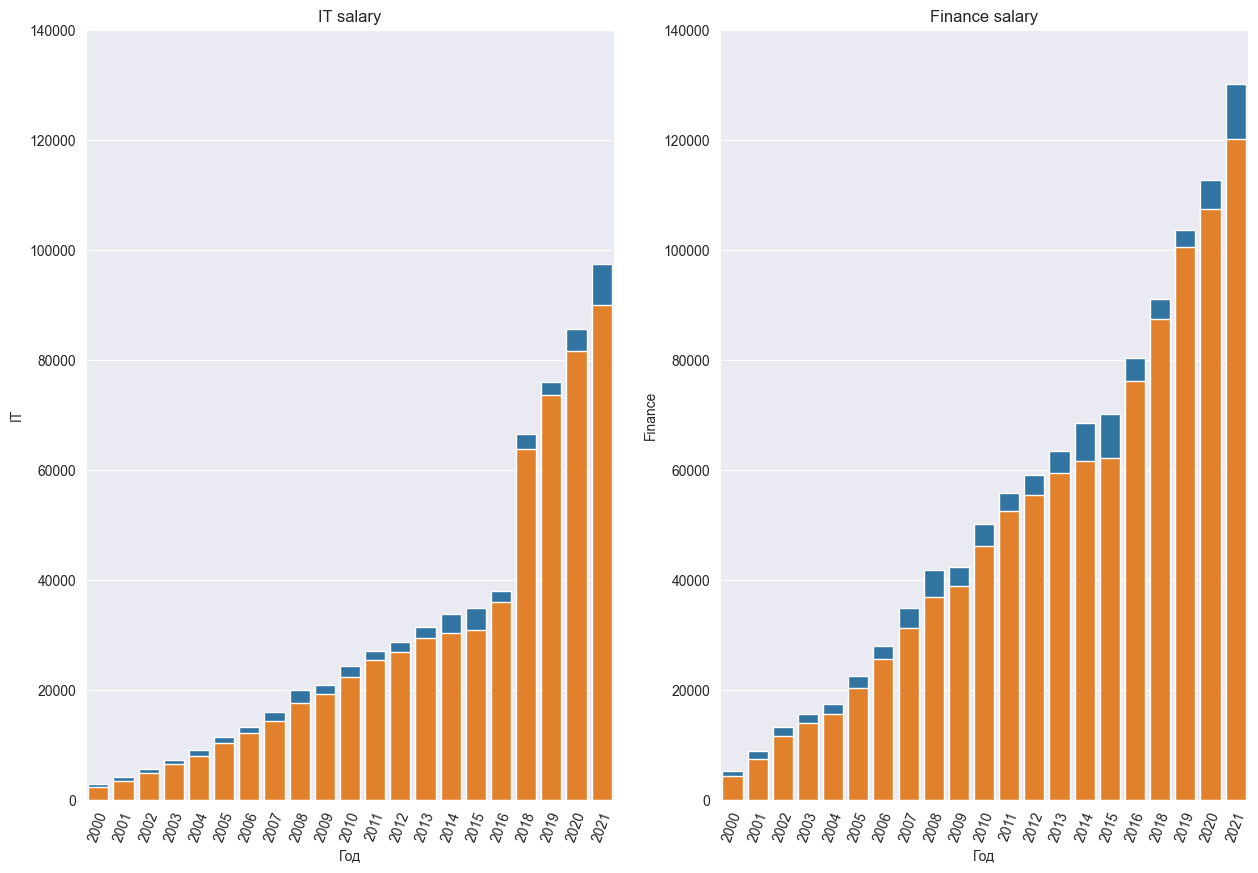

In [100]:
def setup_plot_style(plot, label):
    plot.tick_params(axis='x', rotation=70)
    plot.set_title(label)
    plot.set_ylim(0, 140000)
    

def display_row(data_origin, data_infl, ax, label):
    plot = sns.barplot(data=data_origin, ax=axes[ax])
    plot = sns.barplot(data=data_infl, ax=axes[ax])
    setup_plot_style(plot, label)

fig, axes = plt.subplots(figsize=(15, 10), ncols=2)

display_row(df_zp_copy.iloc[0], df_zp_copy.iloc[3], 0, 'IT salary')
display_row(df_zp_copy.iloc[1], df_zp_copy.iloc[4], 1, 'Finance salary')

## Выводы
Данные имеют схожий тренд. Из начального набора данных видно, что уровень зп уверенно растет. Инфляция безусловно влияет на темп роста реальных зарплат, но не радикально и общий тренд остается.